In [2]:
from qaoa import QAOA, problems, mixers, initialstates

In [3]:
import sys
sys.path.append('../')
import matplotlib.pyplot as pl
from plotroutines import *

In [4]:
from tailassignment_loader import *
instances = 6
flights   = 24
solutions = 3

columns, weights, best_sol = load_FR_CR("data/" + f'FRCR_{instances}_{flights}_{solutions}.txt')

In [5]:
qaoa = QAOA(
    initialstate=initialstates.Plus(),
    problem=problems.ExactCover(
        columns=columns,
        weights=weights
    ),
    mixer=mixers.X()
)

In [6]:
import itertools
print(columns)
nL=columns.shape[1]
print("solutions:")
costs=[]
for s in [''.join(i) for i in itertools.product('01', repeat =nL)]:
    costs.append(-qaoa.problem.cost(s))
    if qaoa.problem.isFeasible(s):
        print(s, -qaoa.problem.cost(s))

[[0. 1. 1. 0. 1. 0.]
 [1. 0. 0. 1. 0. 1.]
 [0. 1. 1. 0. 1. 0.]
 [1. 0. 0. 1. 0. 1.]
 [0. 1. 1. 0. 1. 0.]
 [1. 0. 0. 1. 0. 1.]
 [1. 0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 0. 1.]
 [1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1.]
 [1. 0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 0. 1.]
 [0. 1. 0. 1. 1. 0.]
 [1. 0. 1. 0. 0. 1.]
 [1. 0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 0. 1.]
 [1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 1. 0.]
 [1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 1. 0.]
 [1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 1. 0.]
 [1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 1. 0.]]
solutions:
000011 7.0
001100 10.0
110000 6.0


2025-08-29 21:25:01 [info     ] Calculating energy landscape for depth p=1... file=qaoa.qaoa func=sample_cost_landscape
2025-08-29 21:25:01 [info     ] Executing sample_cost_landscape file=qaoa.qaoa func=sample_cost_landscape
2025-08-29 21:25:01 [info     ] parameters: 2                  file=qaoa.qaoa func=sample_cost_landscape
2025-08-29 21:25:01 [info     ] Done execute                   file=qaoa.qaoa func=sample_cost_landscape


2025-08-29 21:25:07 [info     ] Done measurement               file=qaoa.qaoa func=sample_cost_landscape
2025-08-29 21:25:07 [info     ] Calculating Energy landscape done file=qaoa.qaoa func=sample_cost_landscape


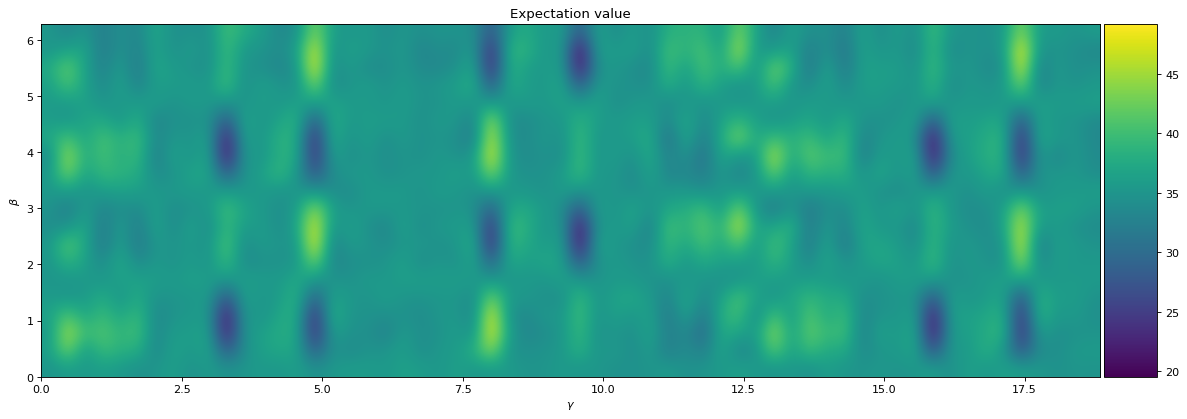

In [7]:
fig = pl.figure(figsize=(18, 6), dpi= 80, facecolor='w', edgecolor='k');
qaoa.sample_cost_landscape(angles={"gamma": [0,6*np.pi,60], "beta": [0,2*np.pi,20]})
plot_E(qaoa, fig=fig)

In [8]:
maxdepth=10
qaoa.optimize(depth=maxdepth)

2025-08-29 21:25:09 [info     ] cost(depth 1 = 18.71875        file=qaoa.qaoa func=optimize
2025-08-29 21:25:10 [info     ] cost(depth 2 = 24.737304687500004 file=qaoa.qaoa func=optimize
2025-08-29 21:25:11 [info     ] cost(depth 3 = 32.701171874999986 file=qaoa.qaoa func=optimize
2025-08-29 21:25:12 [info     ] cost(depth 4 = 20.552734375    file=qaoa.qaoa func=optimize
2025-08-29 21:25:14 [info     ] cost(depth 5 = 27.14843749999999 file=qaoa.qaoa func=optimize
2025-08-29 21:25:16 [info     ] cost(depth 6 = 29.733398437499996 file=qaoa.qaoa func=optimize
2025-08-29 21:25:20 [info     ] cost(depth 7 = 27.85546875     file=qaoa.qaoa func=optimize
2025-08-29 21:25:24 [info     ] cost(depth 8 = 28.5234375      file=qaoa.qaoa func=optimize
2025-08-29 21:25:29 [info     ] cost(depth 9 = 22.765625000000007 file=qaoa.qaoa func=optimize
2025-08-29 21:25:34 [info     ] cost(depth 10 = 30.3720703125  file=qaoa.qaoa func=optimize


In [9]:
min_cost, max_cost = qaoa.problem.computeMinMaxCosts()
min_cost, max_cost

(np.float64(6.0), np.float64(10.0))

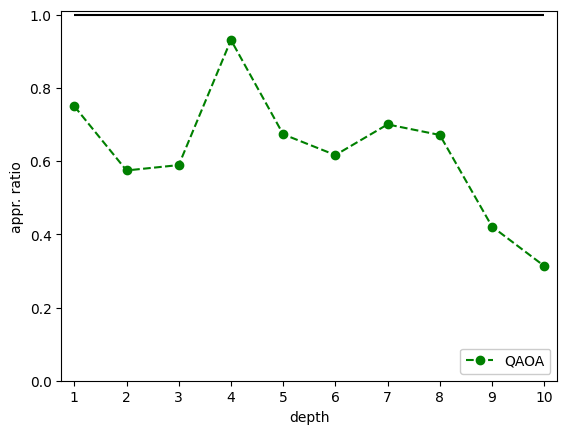

In [10]:
plot_ApproximationRatio(qaoa, maxdepth, mincost=min_cost, maxcost=max_cost, label="QAOA", style="o--g",shots=1024)

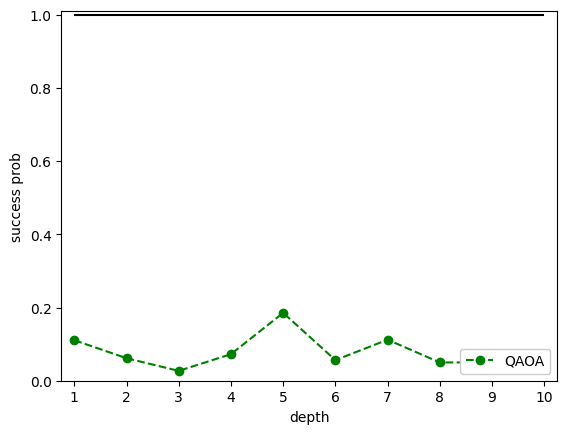

In [11]:
plot_successprob(qaoa, maxdepth, label="QAOA", style="o--g")

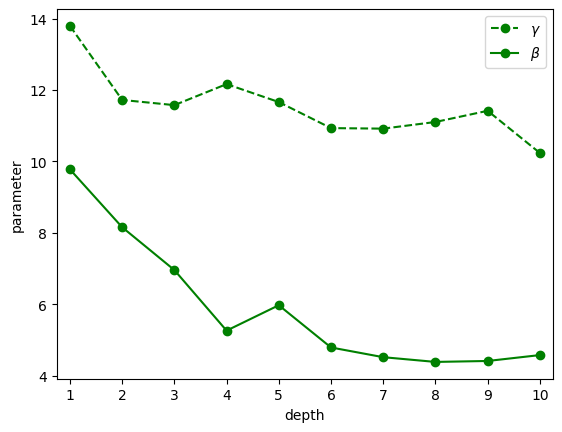

In [12]:
plot_angles(qaoa, maxdepth, label="", style="og")